Добавляем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [ ]:
Создаём функцию для вывода текста

In [2]:
def format_complex_exp(z):
    amplitude = abs(z)
    phase = cmath.phase(z)
    return f"{amplitude:.10f} * e^({phase:.10f}j)"

In [ ]:
Задаём постоянные и переменные

In [15]:
e = 2.7182818284590452353602874713526624977572
V_l = 127
Z_ph1 = 3 + 9j
Z_ph2 = -6j
V_ph = V_l/(3)**0.5
EA = V_ph * e**(0j)
EB = V_ph * e**(-120j*np.pi/180)
EC = V_ph * e**(120j*np.pi/180)
EA_angle = np.angle(EA)
EB_angle = np.angle(EB)
EC_angle = np.angle(EC)

Считаем напряжения

In [16]:
print(format_complex_exp(EA))
print(format_complex_exp(EB))
print(format_complex_exp(EC))

73.3234841871 * e^(0.0000000000j)
73.3234841871 * e^(-2.0943951024j)
73.3234841871 * e^(2.0943951024j)


In [23]:
Volatage_input = {
    '$E_{A}$': {'magnitude': abs(EA), 'angle': np.angle(EA), 'color': 'orange'},
    '$E_{B}$': {'magnitude': abs(EB), 'angle': np.angle(EB), 'color': 'green'},
    '$E_{C}$': {'magnitude': abs(EC), 'angle': np.angle(EC), 'color': 'red'},
}

In [42]:
def create_vector_diagram_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Подпись вектора в его конечной точке
        end_x = start_point_x + magnitude * np.cos(angle) / 2
        end_y = start_point_y + magnitude * np.sin(angle) / 2 + 5
        plt.text(end_x, end_y, name, ha='right', va='bottom', color="black")

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

In [43]:
def create_vector_diagram_no_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

Для проверки строим график

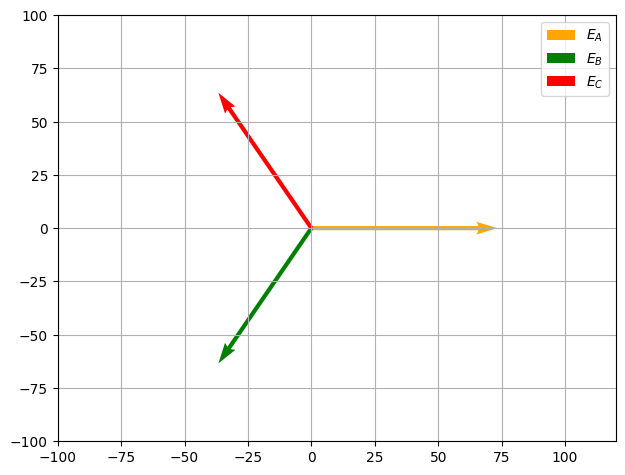

In [25]:
plt.quiver(0, 0, abs(EA) *np.cos(EA_angle), abs(EA) *np.sin(EA_angle), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$E_A$')
plt.quiver(0, 0, abs(EB) *np.cos(EB_angle), abs(EB) *np.sin(EB_angle), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$E_B$')
plt.quiver(0, 0, abs(EC) *np.cos(EC_angle), abs(EC) *np.sin(EC_angle), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$E_C$')


plt.tight_layout()
plt.legend()
plt.xlim(-100, 120) # предел по x откуда и до куда
plt.ylim(-100, 100) # предел по y
plt.grid()

Теперь построим из конца напряжений

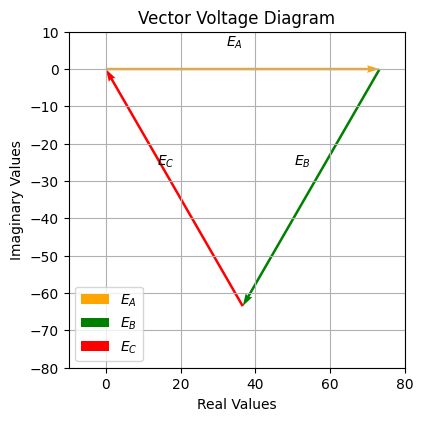

In [55]:
create_vector_diagram_text(Volatage_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Расчёт тока в эквивалентной звезде \\
$
\dot{I_{A}} = \dfrac{\dot{E_{A}}}{Z_{n2}} \\
\dot{I_{B}} = \dfrac{\dot{E_{B}}}{Z_{n2}} \\
\dot{I_{C}} = \dfrac{\dot{E_{C}}}{Z_{n2}}
$

Рассчитываем токи

In [28]:
I_A = EA/(2.3-3.6j)
I_B = EB/(2.3-3.6j)
I_C = EC/(2.3-3.6j)

In [29]:
Currents_input = {
    '$I_{A}$': {'magnitude': abs(I_A), 'angle': np.angle(I_A), 'color': 'orange'},
    '$I_{B}$': {'magnitude': abs(I_B), 'angle': np.angle(I_B), 'color': 'green'},
    '$I_{C}$': {'magnitude': abs(I_C), 'angle': np.angle(I_C), 'color': 'red'},
}

Для проверки строим

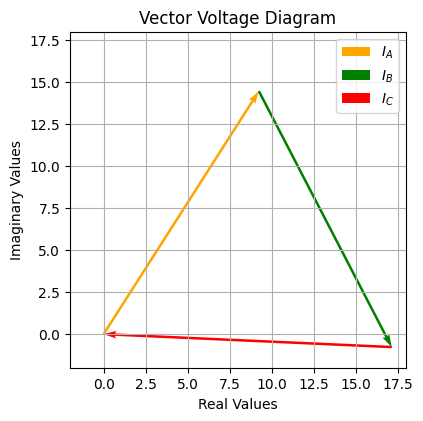

In [58]:
create_vector_diagram_no_text(Currents_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-2, 18)
plt.ylim(-2, 18)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)